
# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

### Importing dataset

In [2]:
data = pd.read_excel("PHD MRI+CTA+MRS 150 complete.xlsx")

In [3]:
data.head()

,Name,COMPLETE,Stroke volume,PRN,age,gender,date of onset,time of onset,date of admission,date of discharge,...,Lt Supraclinoid ICA,Lt Proximal M1 MCA,Lt Distal M1 MCA,Lt M2MCA rear,Lt M2 MCA forward,Lt A1 ACA,clot burden score,Lt ICA origin,Rt ICA origin,CCA
0,Mohan kadam,1.0,1.82102,2.300000e+11,62.0,1.0,2023-11-13 00:00:00,NaN,2023-11-13 00:00:00,2023-11-15 00:00:00,...,2,2,2,1,1,1,19,1.0,NaN,NaN
1,Sumit Pawar,1.0,21.13550,2.400000e+11,35.0,1.0,2024-04-23 00:00:00,0.4375,2024-04-23 00:00:00,00:00:00,...,0,0,0,0,0,0,10,0.0,1.0,NaN
2,Namdev Washilkar,1.0,53.89450,2.400000e+11,50.0,1.0,2024-01-03 00:00:00,18:15:00,2024-01-03 00:00:00,2024-01-15 00:00:00,...,0,0,0,0,0,1,11,0.0,1.0,NaN
3,Hanumant Lohar,1.0,65.18860,2.307031e+08,58.0,1.0,2023-07-23 00:00:00,14:00:00,2023-07-23 00:00:00,2023-08-03 00:00:00,...,0,0,0,0,0,1,11,0.0,1.0,NaN
4,Anjali S raje,1.0,15.04200,2.304042e+08,63.0,2.0,NaN,NaN,2023-04-27 00:00:00,NaN,...,2,0,1,0,0,1,13,1.0,1.0,Bilateral CCA plaque


In [4]:
data.shape

(150, 72)

In [5]:
data.isna().sum()

Name                   0
COMPLETE               2
Stroke volume          0
PRN                   10
age                    3
                    ... 
Lt A1 ACA              0
clot burden score      0
Lt ICA origin          3
Rt ICA origin          4
CCA                  124
Length: 72, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          150 non-null    object 
 1   COMPLETE                      148 non-null    float64
 2   Stroke volume                 150 non-null    float64
 3   PRN                           140 non-null    float64
 4   age                           147 non-null    float64
 5   gender                        147 non-null    float64
 6   date of onset                 106 non-null    object 
 7   time of onset                 96 non-null     object 
 8   date of admission             147 non-null    object 
 9   date of discharge             130 non-null    object 
 10  cell1                         139 non-null    float64
 11  cell2                         52 non-null     float64
 12  NIHSS                         145 non-null    float64
 13  SHT  

In [7]:
data.nunique()

Name                 149
COMPLETE               2
Stroke volume        147
PRN                  113
age                   50
                    ... 
Lt A1 ACA              2
clot burden score     10
Lt ICA origin          2
Rt ICA origin          2
CCA                   16
Length: 72, dtype: int64

### Selecting features manually

In [8]:
data.columns

Index(['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
       'date of onset', 'time of onset', 'date of admission',
       'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'other investigations',
       'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
       'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
       'thrombolysis', 'thrombolytic agent', 'anticoagulation',
       'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
       'barthel index', 'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
       'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
       'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
       

In [9]:
# important_features = ['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
#        'date of onset', 'time of onset', 'date of admission',
#        'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
#        'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
#        'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
#        'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
#        'Triglycerides', 'V LDL', 'b 12', 'other investigations',
#        'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
#        'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
#        'thrombolysis', 'thrombolytic agent', 'anticoagulation',
#        'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
#        'barthel index', 'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
#        'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
#        'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
#        'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA', 'Lt Distal M1 MCA',
#        'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA', 'clot burden score',
#        'Lt ICA origin', 'Rt ICA origin', 'CCA']

In [10]:
important_features = ['Name', 'Stroke volume', 'age', 'gender','NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12',
       'CT ASPECTS','TAN', 'MAS', 'MITEFF', 'MCTA', 
       'MRS','barthel index', 
       'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
       'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
       'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
       'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA', 'Lt Distal M1 MCA',
       'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA', 'clot burden score',
       'Lt ICA origin', 'Rt ICA origin']

In [11]:
# Remove 'MRS' and 'barthel index' from their current positions
important_features.remove('MRS')
important_features.remove('barthel index')

# Append 'MRS' and 'barthel index' to the end
important_features.extend(['MRS', 'barthel index'])

# Reorder the DataFrame columns
data = data[important_features]

In [12]:
data.head()

,Name,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,...,Lt Proximal M1 MCA,Lt Distal M1 MCA,Lt M2MCA rear,Lt M2 MCA forward,Lt A1 ACA,clot burden score,Lt ICA origin,Rt ICA origin,MRS,barthel index
0,Mohan kadam,1.82102,62.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2,2,1,1,1,19,1.0,NaN,4,60
1,Sumit Pawar,21.13550,35.0,1.0,17.0,2.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,10,0.0,1.0,0,100
2,Namdev Washilkar,53.89450,50.0,1.0,24.0,1.0,2.0,2.0,1.0,1.0,...,0,0,0,0,1,11,0.0,1.0,0,100
3,Hanumant Lohar,65.18860,58.0,1.0,6.0,1.0,1.0,2.0,2.0,2.0,...,0,0,0,0,1,11,0.0,1.0,1,100
4,Anjali S raje,15.04200,63.0,2.0,20.0,1.0,1.0,2.0,2.0,2.0,...,0,1,0,0,1,13,1.0,1.0,1,100


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     150 non-null    object 
 1   Stroke volume            150 non-null    float64
 2   age                      147 non-null    float64
 3   gender                   147 non-null    float64
 4   NIHSS                    145 non-null    float64
 5   SHT                      144 non-null    float64
 6   DM                       145 non-null    float64
 7   Alcohol                  145 non-null    float64
 8   smoking                  145 non-null    float64
 9   tobacco                  145 non-null    float64
 10  dyslipidaemia            145 non-null    float64
 11  atrial fibrillation      145 non-null    float64
 12  IHD                      131 non-null    float64
 13  rheumatic heart disease  145 non-null    float64
 14  haemoglobin              1

- Storke Volume is Object , we need all the stroke volume as float

In [14]:
for index, value in data['Stroke volume'].items():
    # Check if each value can be converted to a float
    try:
        float(value)
    except ValueError:
        # If not a float, drop the row
        data.drop(index, inplace=True)

In [15]:
data.loc[:,'Stroke volume'] = pd.to_numeric(data['Stroke volume'], errors='coerce')

## Dealing with NULL values

- Checking Null Stroke Volume

In [16]:
data["Stroke volume"].isna().sum()

0

- Checking NULL MRS value

In [17]:
data['MRS'].isna().sum()

0

In [18]:
data.shape

(150, 49)

### Dropping NULL MRS and NULL Stroke Volume


In [19]:
data.dropna(subset=['MRS'], inplace=True)

In [20]:
data.shape

(150, 49)

In [21]:
data['Stroke volume'].isna().sum()

0

In [22]:
data.dropna(subset=['Stroke volume'],inplace =True)

In [23]:
data.drop(columns=["Name"], inplace=True)

In [24]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,...,Lt Proximal M1 MCA,Lt Distal M1 MCA,Lt M2MCA rear,Lt M2 MCA forward,Lt A1 ACA,clot burden score,Lt ICA origin,Rt ICA origin,MRS,barthel index
0,1.82102,62.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2,2,1,1,1,19,1.0,NaN,4,60
1,21.13550,35.0,1.0,17.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0,0,0,0,0,10,0.0,1.0,0,100
2,53.89450,50.0,1.0,24.0,1.0,2.0,2.0,1.0,1.0,2.0,...,0,0,0,0,1,11,0.0,1.0,0,100
3,65.18860,58.0,1.0,6.0,1.0,1.0,2.0,2.0,2.0,2.0,...,0,0,0,0,1,11,0.0,1.0,1,100
4,15.04200,63.0,2.0,20.0,1.0,1.0,2.0,2.0,2.0,2.0,...,0,1,0,0,1,13,1.0,1.0,1,100


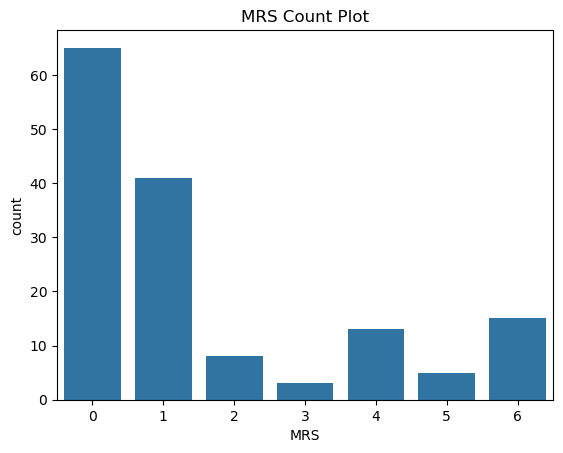

In [25]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [26]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

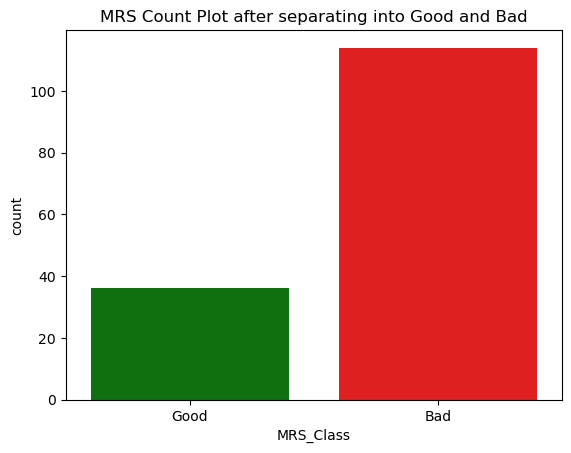

In [27]:
plt.figure()
plt.title('MRS Count Plot after separating into Good and Bad')

# Set the x variable to hue and use integer keys for the palette
sns.countplot(data=data, x='MRS_Class', hue='MRS_Class', palette={0: 'green', 1: 'red'}, legend=False)

# Set the custom x-tick labels
plt.xticks(ticks=[0, 1], labels=['Good', 'Bad'])

plt.show()

## Ajusting Binary Values

In [28]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [29]:
data.reset_index(inplace=True, drop=True)

In [30]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,...,Lt Distal M1 MCA,Lt M2MCA rear,Lt M2 MCA forward,Lt A1 ACA,clot burden score,Lt ICA origin,Rt ICA origin,MRS,barthel index,MRS_Class
0,1.82102,62.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,...,2,1,1,1,19,1.0,NaN,4,60,0
1,21.13550,35.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,10,0.0,1.0,0,100,1
2,53.89450,50.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,2.0,...,0,0,0,1,11,0.0,1.0,0,100,1
3,65.18860,58.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0,0,0,1,11,0.0,1.0,1,100,1
4,15.04200,63.0,0.0,20.0,1.0,1.0,0.0,0.0,0.0,2.0,...,1,0,0,1,13,1.0,1.0,1,100,1


In [31]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

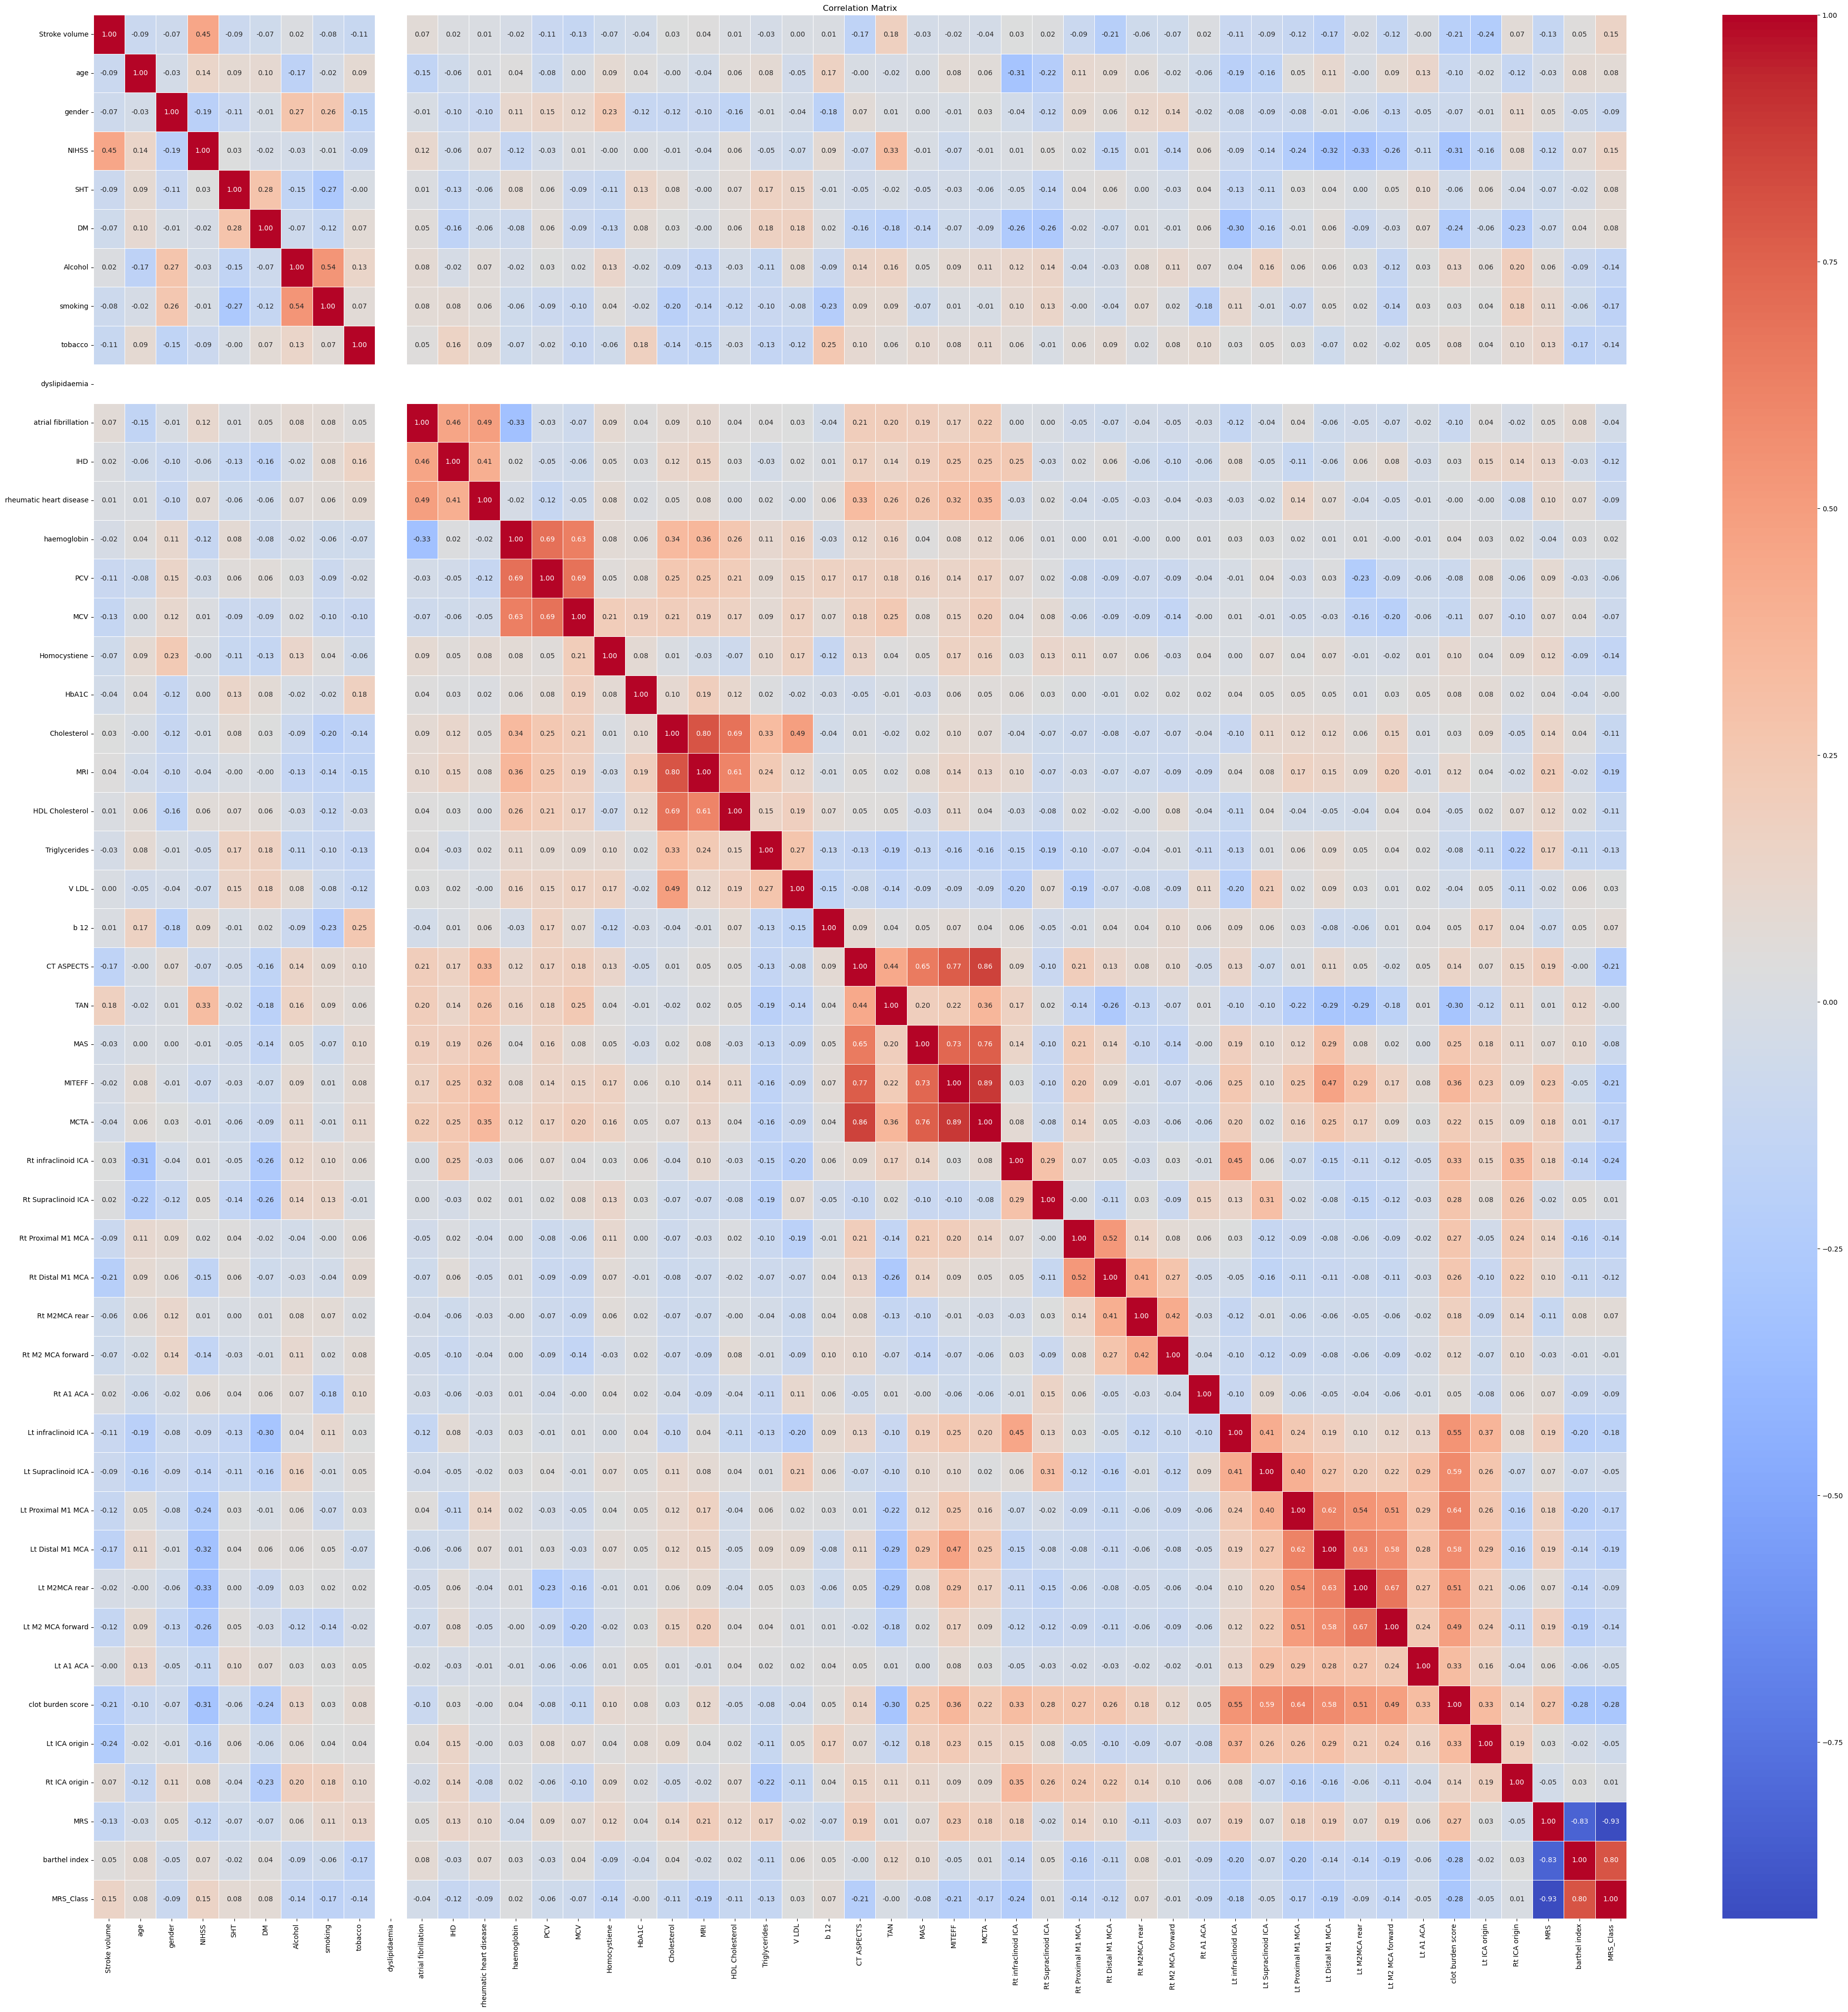

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [33]:
y = data.iloc[:,-1].values
z = data.iloc[:,-2].values
X = data.drop(columns=["MRS","barthel index", "MRS_Class"])
X = X.to_numpy()

In [34]:
y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [35]:
z

array([ 60, 100, 100, 100, 100, 100, 100, 100, 100, 100,  85,   0, 100,
       100, 100, 100,   0, 100,  80, 100, 100,  65,   0, 100, 100, 100,
       100, 100, 100, 100, 100,  95,  40,   0,  85, 100, 100, 100, 100,
       100, 100, 100, 100,  90, 100,  90, 100, 100, 100,  70,  95,  95,
        65,  35,  40, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100,  85,  90,  95,  95,  95, 100, 100,  70,
       100,  80,  65,  85,  25,   0,   0,   0, 100, 100, 100, 100, 100,
       100,  80,  90,  90,  95,  95,  95,  95,  95,  85, 100,  85,  60,
        70,  15,  15,  20,  25,  50,  50,  65,  65,  10,  15,  25,   0,
         0,   0,   0,   0,   0,   0,   0, 100,   0, 100,   0, 100, 100,
       100, 100, 100,   0, 100, 100,  95, 100, 100, 100, 100,  85, 100,
        85, 100,  90,  45,  20,   0,   0], dtype=int64)

In [36]:
X

array([[ 1.82102 , 62.      ,  1.      , ..., 19.      ,  1.      ,
              nan],
       [21.1355  , 35.      ,  1.      , ..., 10.      ,  0.      ,
         1.      ],
       [53.8945  , 50.      ,  1.      , ..., 11.      ,  0.      ,
         1.      ],
       ...,
       [ 0.988   , 45.      ,  1.      , ..., 20.      ,  0.      ,
         1.      ],
       [ 0.716785, 32.      ,  1.      , ..., 20.      ,  1.      ,
         1.      ],
       [58.7182  , 75.      ,  0.      , ..., 19.      ,  0.      ,
         0.      ]])

## Preprocessing Pipeline

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [38]:
data.isna().sum()

Stroke volume               0
age                         3
gender                      3
NIHSS                       5
SHT                         6
DM                          5
Alcohol                     5
smoking                     5
tobacco                     5
dyslipidaemia               5
atrial fibrillation         5
IHD                        19
rheumatic heart disease     5
haemoglobin                 5
PCV                        22
MCV                        71
Homocystiene               13
HbA1C                      29
Cholesterol                35
MRI                        35
HDL Cholesterol            35
Triglycerides              49
V LDL                      36
b 12                       22
CT ASPECTS                 46
TAN                        47
MAS                        47
MITEFF                     47
MCTA                       47
Rt infraclinoid ICA         0
Rt Supraclinoid ICA         0
Rt Proximal M1 MCA          0
Rt Distal M1 MCA            0
Rt M2MCA r

In [39]:
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')
binary_features = [data.columns.get_loc(feature) for feature in binary_features]
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [40]:
numeric_features = ['Stroke volume', 'age', 'NIHSS', 'haemoglobin', 'Homocystiene', 'CT ASPECTS']
numeric_features = [data.columns.get_loc(feature) for feature in numeric_features]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features),
    ]
)

In [42]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

## Feature Selection

In [43]:
base_classifier = RandomForestClassifier()
selector = RFE(estimator=base_classifier, n_features_to_select=10)

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [44]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [45]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessing_pipeline),
        ('feature_selection', selector),
        ('classifier', base_classifier)
    ]
)

## Cross Validation Pipeline

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [47]:
# Define parameters for GridSearchCV
param_grid = [
    # Parameters for RFE
    {'feature_selection__n_features_to_select': [5, 10]},  # Specify the number of features to select
    # Parameters for Decision Tree
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    # Parameters for Random Forest
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__bootstrap': [True, False]
    },
    # Parameters for AdaBoost
    {
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01, 0.001],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=3)]
    },
    # Parameters for Gradient Boosting
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01, 0.001],
        'classifier__max_depth': [3, 5, 10]
    },
    # Parameters for XGBoost
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.1, 0.01, 0.001]
    },
    # Parameters for LGBM
    {
        'classifier': [LGBMClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.1, 0.01, 0.001]
    },
    # Parameters for Bagging Classifier
    {
        'classifier': [BaggingClassifier()],
        'classifier__n_estimators': [10, 50, 100],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=5), LogisticRegression(C=0.1, penalty='l1', solver='liblinear')]
    }
]

In [48]:
# params = [param1, param2, param3, param4, param5, param6, param7]

In [49]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [50]:
# grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit=False, verbose=2)
# grid.fit(X, y)

In [ ]:
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit='f1', verbose=1)
grid.fit(X, y)

In [52]:
print(grid.best_params_)

{'classifier': RandomForestClassifier(), 'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__n_estimators': 50}


In [53]:
print(grid.best_score_)

0.9438945981554678


In [66]:
means = np.round_(grid.cv_results_['mean_test_accuracy'], 6)

In [67]:
params_summary = grid.cv_results_['params']

In [68]:
df = pd.DataFrame(list(zip(means, params_summary)), columns=['Mean Score', 'Parmeters'])
df = df.sort_values(by = 'Mean Score', ascending=False)

In [72]:
from datetime import datetime
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'Results-'+ current_datetime +'.xlsx'
df.to_excel(result_filename, index=False)

In [76]:
import pandas as pd
import numpy as np
from datetime import datetime

# List of scoring metrics used in GridSearchCV
scoring_metrics = ['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy']

# Extracting the parameter settings for each run and combining them into one column
params_summary = grid.cv_results_['params']
combined_params = [str(param_set) for param_set in params_summary]

# Creating an initial DataFrame with combined parameters
df = pd.DataFrame({'Parameters': combined_params})

# Adding mean scores for each scoring metric to the DataFrame
for metric in scoring_metrics:
    mean_score_key = f'mean_test_{metric}'
    
    if mean_score_key in grid.cv_results_:
        # Extract the mean scores and add to the DataFrame
        df[f'Mean {metric.capitalize()} Score'] = np.round_(grid.cv_results_[mean_score_key], 6)
    else:
        print(f"Metric '{metric}' not found in cv_results_")

# Sorting by F1 Score as it was the refit metric
df = df.sort_values(by='Mean F1 Score', ascending=False)

# Saving the DataFrame to an Excel file
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'MRS Prediction Results-' + current_datetime + '.xlsx'
df.to_excel(result_filename, index=False)

print(f"Results saved to {result_filename}")


Results saved to MRS Prediction Results-14-10-2024-22-38-03.xlsx
